In [36]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.model_selection import train_test_split

%matplotlib inline

In [37]:
df = pd.read_csv('data/Housing_Modified.csv')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


***Data preprocessing***

In [38]:
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [39]:
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']
df.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,False,False,True
1,38500.0,4000,2,1,1,0,0,0,0,0,0,True,False,False
2,49500.0,3060,3,1,1,0,0,0,0,0,0,True,False,False
3,60500.0,6650,3,1,1,1,0,0,0,0,0,False,False,True
4,61000.0,6360,2,1,1,0,0,0,0,0,0,True,False,False


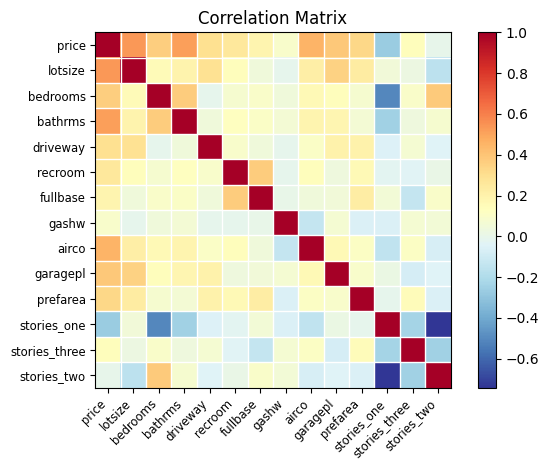

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.016610,-0.079170,-0.041931


In [40]:
# create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()
corr

<Axes: >

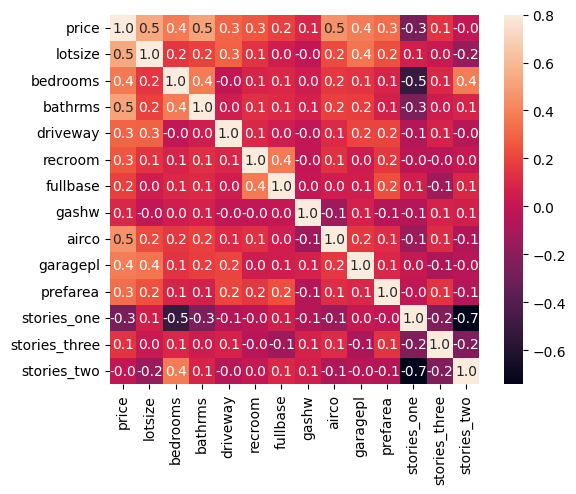

In [41]:
# Alternatively we can use seaborn package
import seaborn as sns

sns.heatmap(df.corr(), vmax=.8, square=True,annot=True,fmt='.1f')

***Variation Inflation Factor***

VIF value of greater than 10 is a indicator of multicollinearity, and these variables should be excluded from the regression model.

In [60]:
# create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', 'recroom',
                         'fullbase','gashw','airco','garagepl', 'prefarea',
                        'stories_one','stories_two','stories_three']

# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
X[['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']] = X[['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']].astype(int)
X = X.fillna(X.mean())
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print('Final variables:', independent_variables)

vif : [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.013320236472385, 1.1034879198994194, 1.756746206560902, 1.9826489313438442, 1.5332946465459893, 3.9657526747868594, 5.511702408354892, 1.7700402770614867]
dropping 'bedrooms' at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


***Run first iteration of model***

In [65]:
# use the list to select a subset from original DataFrame
X = df[independent_variables]
X[['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']] = X[['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']].astype(int)
X = X.fillna(X.mean())
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

# create a fitted model
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              731.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                   1.46e-274
Time:                        11:42:10   Log-Likelihood:                         -4828.1
No. Observations:                 436   AIC:                                      9680.
Df Residuals:                     424   BIC:                                      9729.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.8626      0.401      9.629      0.000       3.074       4.651
bathrms        2.005e+04   1417.881     14.139      0.000    1.73e+04    2.28e+04
driveway       1.198e+04   2146.338      5.581      0.000    7759.759    1.62e+04
recroom        3285.2328   2188.288      1.501      0.134   -1016.010    7586.476
fullbase       4775.3171   1831.641      2.607      0.009    1175.090    8375.544
gashw           1.42e+04   3554.187      3.995      0.000    7214.613    2.12e+04
airco          1.425e+04   1791.906      7.950      0.000    1.07e+04    1.78e+04
garagepl       4652.5499    983.036      4.733      0.000    2720.319    6584.781
prefarea       8080.7376   2026.326      3.988      0.000    4097.842    1.21e+04
stories_one   -5273.4580   2227.269     -2.368      0.018   -9651.321    -895.595
stories_two     469.8222   2288.422      0.205      0.837   -4028.241    4967.886
stories_three  1.072e+04   3519.387      3.047      0.002    3804.264    1.76e+04
==============================================================================
Omnibus:                       22.770   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.535
Skew:                           0.383   Prob(JB):                     1.92e-08
Kurtosis:                       4.170   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_pred = lm.predict(X) # full data
print("Train MAE:", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Print evaluation metrics for the full dataset
print("Full Data MAE:", metrics.mean_absolute_error(y, y_pred))
print("Full Data RMSE:", np.sqrt(metrics.mean_squared_error(y, y_pred)))


Train MAE: 11987.660160035883
Train RMSE: 15593.474917800835
Test MAE: 12722.079675396282
Test RMSE: 17509.250040030376
Full Data MAE: 12135.62013565794
Full Data RMSE: 15997.901569773374


Lets remove recroom and stories_two has they have p value greater than 0.05 and re-run the model.

In [76]:
# create a Python list of feature names
independent_variables = ['lotsize', 'bathrms','driveway', 'fullbase','gashw', 'airco','garagepl', 
                         'prefarea','stories_one','stories_three']

# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
X[['lotsize', 'bathrms','driveway', 'fullbase','gashw', 'airco','garagepl', 
                         'prefarea','stories_one','stories_three']] = X[['lotsize', 'bathrms','driveway', 'fullbase','gashw', 'airco','garagepl', 
                         'prefarea','stories_one','stories_three']].astype(int)
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

# create a fitted model
lm = sm.OLS(y_train, X_train).fit()

# print the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              876.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                   5.12e-277
Time:                        11:58:14   Log-Likelihood:                         -4829.2
No. Observations:                 436   AIC:                                      9678.
Df Residuals:                     426   BIC:                                      9719.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.9230      0.394      9.965      0.000       3.149       4.697
bathrms        2.017e+04   1302.611     15.482      0.000    1.76e+04    2.27e+04
driveway       1.224e+04   1992.869      6.141      0.000    8320.184    1.62e+04
fullbase       5729.3094   1691.457      3.387      0.001    2404.668    9053.951
gashw          1.432e+04   3542.864      4.043      0.000    7360.770    2.13e+04
airco          1.435e+04   1762.371      8.143      0.000    1.09e+04    1.78e+04
garagepl       4539.7003    965.076      4.704      0.000    2642.797    6436.603
prefarea       8261.1981   2021.190      4.087      0.000    4288.451    1.22e+04
stories_one   -5762.8950   1549.027     -3.720      0.000   -8807.582   -2718.208
stories_three   1.03e+04   3101.467      3.320      0.001    4201.004    1.64e+04
==============================================================================
Omnibus:                       20.984   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.279
Skew:                           0.371   Prob(JB):                     1.61e-07
Kurtosis:                       4.082   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_pred = lm.predict(X) # full data

In [78]:
print("Train MAE:", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Print evaluation metrics for the full dataset
print("Full Data MAE:", metrics.mean_absolute_error(y, y_pred))
print("Full Data RMSE:", np.sqrt(metrics.mean_squared_error(y, y_pred)))


Train MAE: 11993.343681561722
Train RMSE: 15634.999542918895
Test MAE: 12902.479959106458
Test RMSE: 17694.934140516536
Full Data MAE: 12176.503004876597
Full Data RMSE: 16071.257090177114


***Outliers***

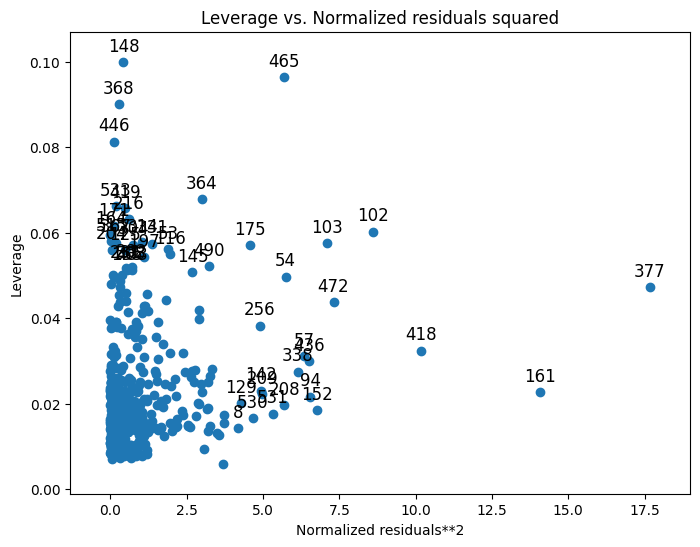

In [79]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm, ax = ax)

***Bonferroni Outlier Test***

In [94]:
# Find outliers #
# Bonferroni outlier test
test = lm.outlier_test()

print('Bad data points (bonf(p) < 0.05):')
print(test[test.iloc[:, 2] < 0.05])

Bad data points (bonf(p) < 0.05):
     student_resid   unadj_p   bonf(p)
377       4.387449  0.000014  0.006315


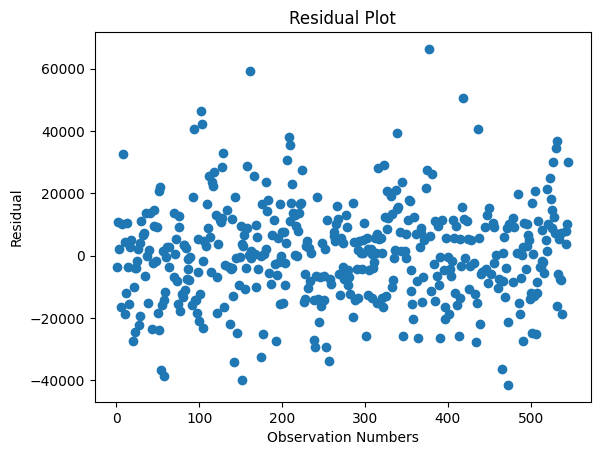

Text(0, 0.5, 'Observation Numbers')

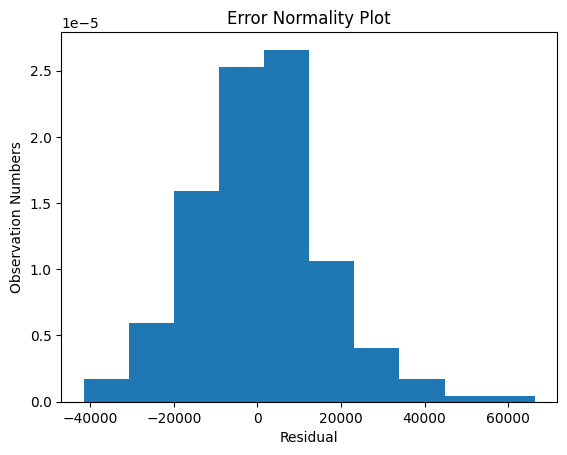

In [95]:
# plot to check homoscedasticity
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()

# normality plot
plt.hist(lm.resid, density=True)
plt.title('Error Normality Plot')
plt.xlabel('Residual')
plt.ylabel('Observation Numbers')

**if the residual plot is not scattered or not normally distributed then there is a chance that independent variable is not having linear relationship and applying appropriate transformation to the independent variable will fix the issue.**

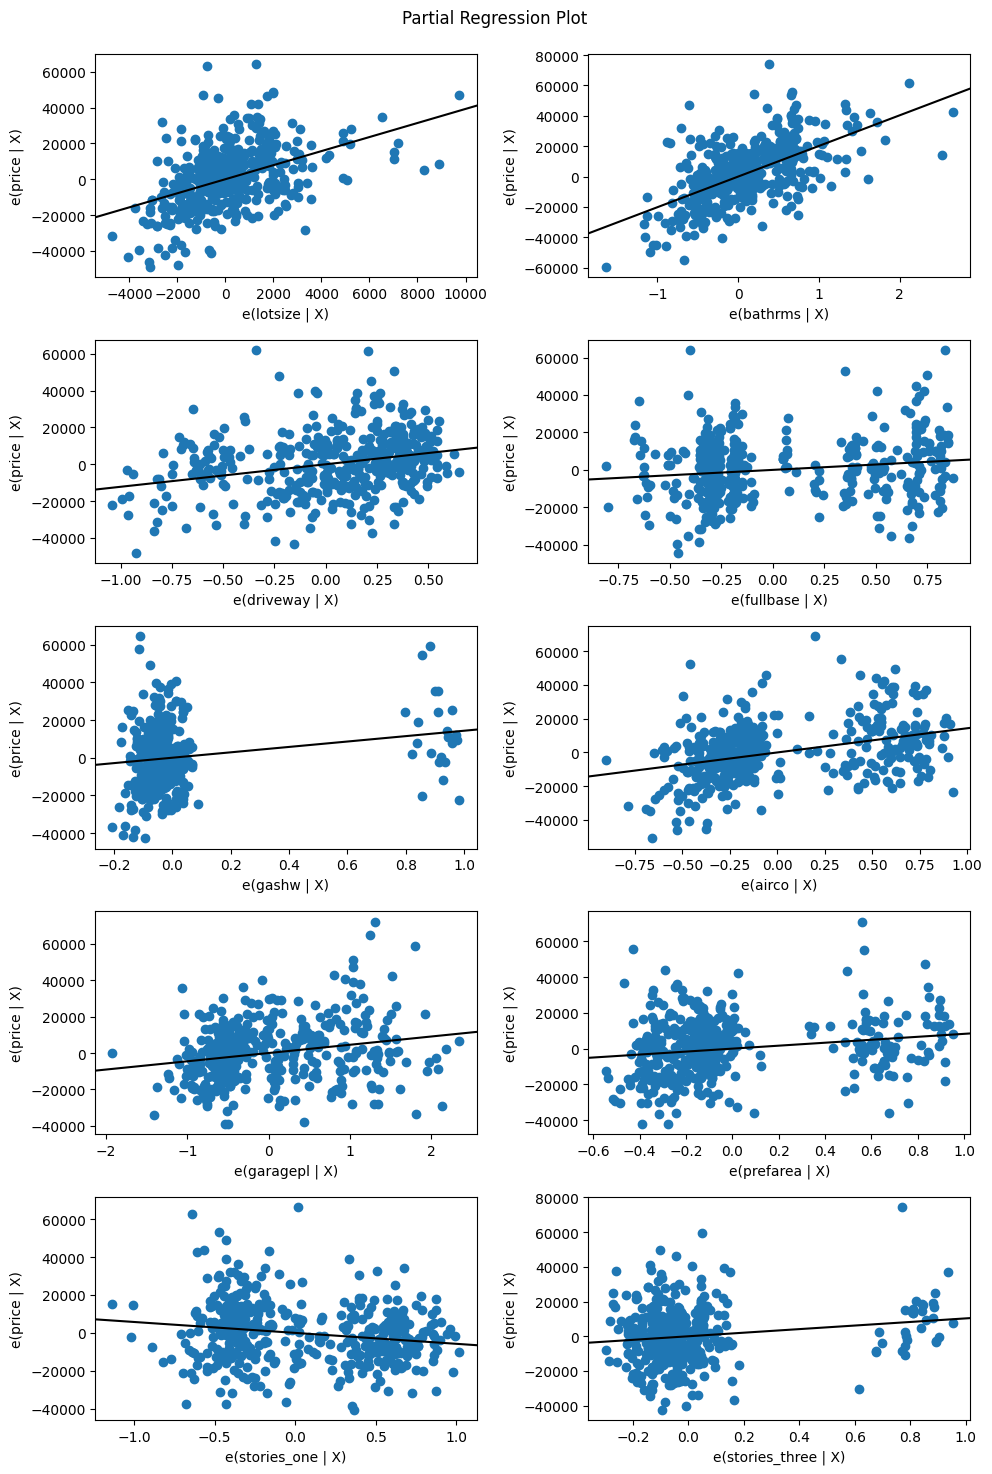

In [96]:
# linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

***Regularization***

In [97]:
from sklearn import linear_model

# Load data
df = pd.read_csv('data/Grade_Set_2.csv')
df.columns = ['x','y']

for i in range(2,50):              # power of 1 is already there
    colname = 'x_%d'%i              # new var will be x_power
    df[colname] = df['x']**i

independent_variables = list(df.columns)
independent_variables.remove('y')

X= df[independent_variables]       # independent variable
y= df.y                            # dependent variable 


In [98]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

In [99]:
# Ridge regression
lr = linear_model.Ridge(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("------ Ridge Regression ------")
print ("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print ("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print ("Ridge Coef: ", lr.coef_)

------ Ridge Regression ------
Train MAE:  13.23303648873574
Train RMSE:  16.87259547067167
Test MAE:  21.973745021751768
Test RMSE:  22.009112336405487
Ridge Coef:  [ 8.67127091e-89  1.13658541e-87  1.29054357e-86  1.39193904e-85
  1.46163224e-84  1.51065504e-83  1.54557648e-82  1.57047809e-81
  1.58797156e-80  1.59977083e-79  1.60702465e-78  1.61051501e-77
  1.61077848e-76  1.60818239e-75  1.60297372e-74  1.59531134e-73
  1.58528767e-72  1.57294361e-71  1.55827906e-70  1.54126043e-69
  1.52182627e-68  1.49989158e-67  1.47535130e-66  1.44808334e-65
  1.41795140e-64  1.38480789e-63  1.34849705e-62  1.30885857e-61
  1.26573196e-60  1.21896180e-59  1.16840429e-58  1.11393537e-57
  1.05546076e-56  9.92928513e-56  9.26344513e-55  8.55791671e-54
  7.81453618e-53  7.03643862e-52  6.22841607e-51  5.39735647e-50
  4.55278070e-49  3.70749814e-48  2.87840597e-47  2.08746206e-46
  1.36286766e-45  7.40503400e-45  2.65671003e-44 -4.79631528e-45
  2.10847992e-46]


In [100]:
# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("----- LASSO Regression -----")
print ("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print ("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print ("LASSO Coef: ", lr.coef_)

----- LASSO Regression -----
Train MAE:  0.8423742988874459
Train RMSE:  1.2191291855605888
Test MAE:  4.323647594043465
Test RMSE:  4.872324349696699
LASSO Coef:  [ 1.29948409e+00  3.92103580e-01  1.75369422e-02  7.79647589e-04
  3.02339084e-05  3.35699852e-07 -1.13749601e-07 -1.79773817e-08
 -1.93826156e-09 -1.78643532e-10 -1.50240566e-11 -1.18610891e-12
 -8.91794276e-14 -6.43309631e-15 -4.46487394e-16 -2.97784537e-17
 -1.89686955e-18 -1.13767046e-19 -6.22157254e-21 -2.84658206e-22
 -7.32019963e-24  5.16015995e-25  1.18616856e-25  1.48398312e-26
  1.55203577e-27  1.48667153e-28  1.35117812e-29  1.18576052e-30
  1.01487234e-31  8.52473862e-33  7.05722034e-34  5.77507464e-35
  4.68162529e-36  3.76585569e-37  3.00961249e-38  2.39206785e-39
  1.89235649e-40  1.49102460e-41  1.17072537e-42  9.16453614e-44
  7.15512017e-45  5.57333358e-46  4.33236496e-47  3.36163309e-48
  2.60423554e-49  2.01461728e-50  1.55652093e-51  1.20123190e-52
  9.26105400e-54]
